In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm
import numpy as np

In [3]:
## Read in excel file
df = pd.read_excel('../Data/Folds5x2_pp.xlsx')

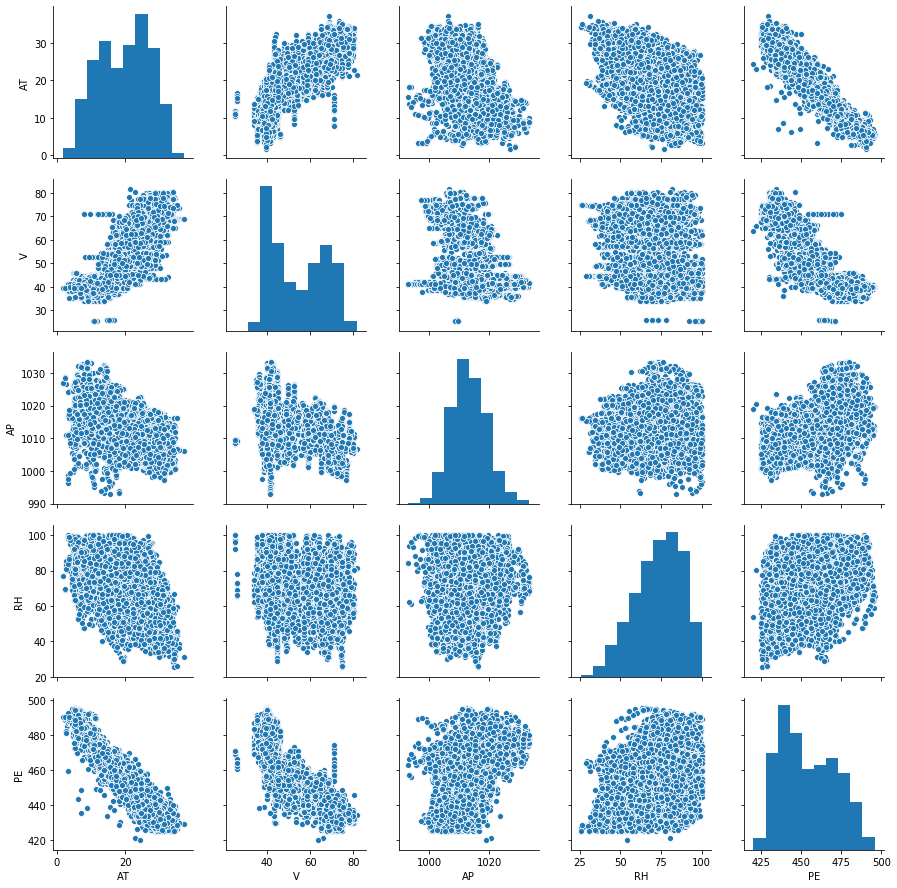

In [4]:
## 1b i)
"""
Rows: 9,568--They represent the hourly average ambient variables of the power plant
Columns: 5--They represent the features of the power r (temperature, ambient pressure, relative humidiy, exhaust vacuum, and energy output)
"""

## 1b ii)
g = sns.pairplot(df)
"""
- The independent variables don't seem to have a relationship with one another
- There is an inverse relationship between AT v. PE, and V vs. PE
"""

In [4]:
# 1b iii)
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


0.0


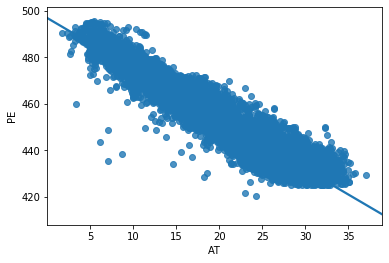

0.0


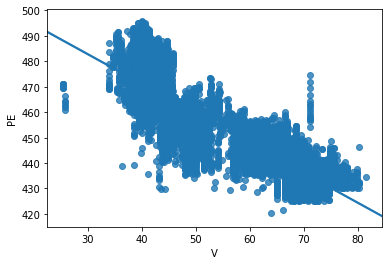

0.0


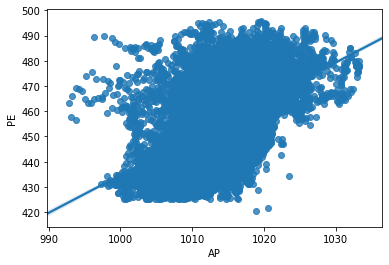

0.0


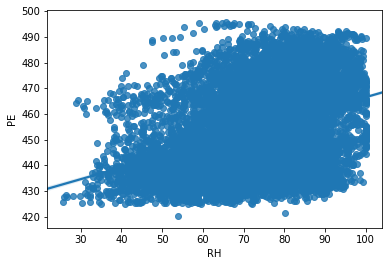

[-2.1713199585178002, -1.1681351265557094, 1.4898716733991142, 0.455650102262979]


In [13]:
#1c Simple Linear Regression
##X = np.array(df['AT']).reshape(1, -1)
##y = np.array(df['PE']).reshape(1, -1)
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
##reg = LinearRegression()
##reg.fit(X, y)

# list to store coefficients for later (part e)
uni_coeff = []

cols_inc = df.columns[~df.columns.str.contains('PE')]
for col in cols_inc:
    X = df[col]
    y = df['PE']
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.pvalues.loc[col])
    uni_coeff.append(est2.params[1])
    sns.regplot(x=col, y='PE', data=df)
    plt.show()

print(uni_coeff)

# All of them have a statistically significant result p value (all having values close to 0)
# The latter 2 scatterplots may not clearly convey that they are correlated but
# this merely means that they have a low R2 value

In [26]:
# 1d
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
multi_coeff = [est2.params['AT'], est2.params['V'], est2.params['AP'], est2.params['RH']]
print(multi_coeff)

# we reject the null hypothesis for all predictors

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:16:15   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

[[-2.17131996 -1.97751311]
 [-1.16813513 -0.23391642]
 [ 1.48987167  0.06208294]
 [ 0.4556501  -0.1580541 ]]


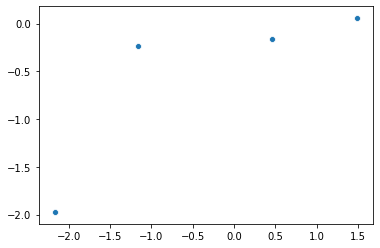

In [38]:
#1e
s = np.vstack((uni_coeff, multi_coeff))
s = np.transpose(s)
print(s)

sns.scatterplot(uni_coeff, multi_coeff)

In [47]:
#1f
from sklearn.preprocessing import PolynomialFeatures

for col in cols_inc:
    X = np.reshape(np.array(df[col]), (-1,1))
    y = df['PE']
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(X)
    X2 = sm.add_constant(X_poly)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

## Yes, AT, V, and AP have statistically significance in its quadratic terms

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 4.674e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:14:03   Log-Likelihood:                -29350.
No. Observations:                9568   AIC:                         5.871e+04
Df Residuals:                    9565   BIC:                         5.873e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        505.9504      0.341   1484.226      0.0

In [61]:
AT_V = df['AT'] * df['V']
AT_AP = df['AT'] * df['AP']
AT_RH = df['AT'] * df['RH']
V_AP = df['AP'] * df['V']
V_RH = df['V'] * df['RH']
AP_RH = df['AP'] * df['RH']

X = pd.DataFrame([df['AT'], df['V'], df['AP'], df['RH'], AT_V, AT_AP, AT_RH, V_AP, V_RH, AP_RH])
X = X.T
X.columns = ['AT', 'V', 'AP', 'RH', 'AT_V', 'AT_AP', 'AT_RH', 'V_AP', 'V_RH', 'AP_RH']
X2 = sm.add_constant(X)
y = df['PE']
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

## The interaction terms which are statistically significant are AT_V, AT_RH, V_AP, and AP_RH

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:00:53   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

0


Text(0, 0.5, 'Mean Square Error')

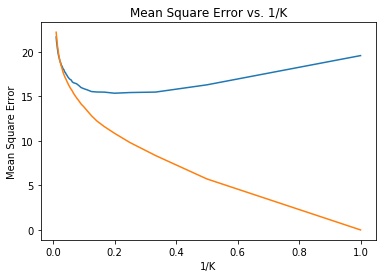

In [73]:
##1h
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# RAW
k = np.linspace(1, 100, num=100)
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
mean_agg_te = []
mean_agg_tr = []
for i in k:
    neigh = KNeighborsRegressor(n_neighbors=int(i))
    neigh.fit(X_train, y_train)
    prediction = neigh.predict(X_test)

    diff = np.array(prediction) - np.array(y_test)
    diff_sq = np.square(diff)
    mean_agg_te.append(np.mean(diff_sq))
    
    prediction = neigh.predict(X_train)
    diff_tr = np.array(prediction) - np.array(y_train)
    diff_sq_tr = np.square(diff_tr)
    mean_agg_tr.append(np.mean(diff_sq_tr))

k_inv = 1/k
print(np.argmin(mean_agg_tr))
#ideal at k = 4
plt.plot(k_inv, mean_agg_te)
plt.plot(k_inv, mean_agg_tr)
plt.title("Mean Square Error vs. 1/K")
plt.xlabel("1/K")
plt.ylabel("Mean Square Error")

0


Text(0, 0.5, 'Mean Square Error')

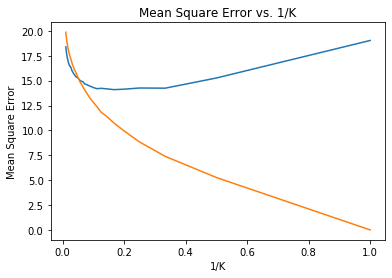

In [74]:
from sklearn.preprocessing import scale

#NORMALIZED
k = np.linspace(1, 100, num=100)
X = df[['AT', 'V', 'AP', 'RH']]
Xs = scale(X)

y = df['PE']
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30)
mean_agg_te = []
mean_agg_tr = []
for i in k:
    neigh = KNeighborsRegressor(n_neighbors=int(i))
    neigh.fit(X_train, y_train)
    prediction = neigh.predict(X_test)

    diff = np.array(prediction) - np.array(y_test)
    diff_sq = np.square(diff)
    mean_agg_te.append(np.mean(diff_sq))
    
    prediction = neigh.predict(X_train)
    diff_tr = np.array(prediction) - np.array(y_train)
    diff_sq_tr = np.square(diff_tr)
    mean_agg_tr.append(np.mean(diff_sq_tr))

k_inv = 1/k
print(np.argmin(mean_agg_te))
#ideal at k = 6
plt.plot(k_inv, mean_agg_te)
plt.plot(k_inv, mean_agg_tr)
plt.title("Mean Square Error vs. 1/K")
plt.xlabel("1/K")
plt.ylabel("Mean Square Error")

In [28]:
## EXTRA CREDIT
# COMBINED analysis to determine p values of interaction terms and quadratic association

AT_V = df['AT'] * df['V']
AT_AP = df['AT'] * df['AP']
AT_RH = df['AT'] * df['RH']
V_AP = df['AP'] * df['V']
V_RH = df['V'] * df['RH']
AP_RH = df['AP'] * df['RH']
AT2 = df['AT'] * df['AT']
V2 = df['V'] * df['V']
AP2 = df['AP'] * df['AP']
RH2 = df['RH'] * df['RH']


X = pd.DataFrame([df['AT'], df['V'], df['AP'], df['RH'], AT_V, AT_AP, AT_RH, V_AP, V_RH, AP_RH, AT2, V2, AP2, RH2])
X = X.T
X.columns = ['AT', 'V', 'AP', 'RH', 'AT_V', 'AT_AP', 'AT_RH', 'V_AP', 'V_RH', 'AP_RH', 'AT2', 'V2', 'AP2', 'RH2']
X2 = sm.add_constant(X)
y = df['PE']
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

reg = LinearRegression().fit(X_train, y_train)

# Test Error
prediction = reg.predict(X_test)
diff = np.array(prediction) - np.array(y_test)
diff_sq = np.square(diff)
print("Test error (MSE): " + str(np.mean(diff_sq)))

# Training error
pred2 = reg.predict(X_train)
diff2 = np.array(pred2) - np.array(y_train)
diff_sq2 = np.square(diff2)
print("Training error (MSE): " + str(np.mean(diff_sq2)))



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:59:27   Log-Likelihood:                -27431.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9553   BIC:                         5.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7503.7323   1207.276     -6.215      0.0

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
## EXTRA CREDIT
# I used the information from part f, g, and the combined analysis above
# Meaning I excluded AT_AP, V_RH, and RH2
# From above, I excluded the V2 variable because that was not statistically significant
# It turns out this is the most minimal MSE result
from sklearn.model_selection import train_test_split

X = pd.DataFrame([df['AT'], df['V'], df['AP'], df['RH'], AT_V, AT_RH, V_AP, AP_RH, AT2, AP2])
X = X.T
X.columns = ['AT', 'V', 'AP', 'RH', 'AT_V', 'AT_RH', 'V_AP', 'AP_RH', 'AT2', 'AP2']
y = df['PE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

reg = LinearRegression().fit(X_train, y_train)

# Test Error
prediction = reg.predict(X_test)
diff = np.array(prediction) - np.array(y_test)
diff_sq = np.square(diff)
print("Test error (MSE): " + str(np.mean(diff_sq)))

# Training error
pred2 = reg.predict(X_train)
diff2 = np.array(pred2) - np.array(y_train)
diff_sq2 = np.square(diff2)
print("Training error (MSE): " + str(np.mean(diff_sq2)))

Test error (MSE): 18.54478370171332
Training error (MSE): 18.117887803026473


In [15]:
### MSE COMPARISON
## kNN regression (normalized): <15
## Linear regression: ~18
# Analysis: Perhaps this is because the linear regressor method assumes linearity, and that
# attempting to analyse interaction of variables & quadratic relationships are merely
# confounding the trends, which is a superficial attempt to reduce error but doesn't solve
# the problem that we are assuming their relationship from p values. However, the kNN regressor
# goes purely off of data (similar points) which, given we have a lot of datapoints,
# makes sense that it does consistently better 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:52:57   Log-Likelihood:                -27431.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9553   BIC:                         5.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7503.7323   1207.276     -6.215      0.0

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
